In [ ]:
import os.path
import re
from itertools import chain
from pathlib import Path

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.dates import YearLocator, DateFormatter
from pandas import DataFrame

from data_access.data_loader import DataLoader

In [ ]:
db_config = "C:\\Users\\tizia\\PycharmProjects\\DDQN_Trading_MSC\\db_config.json"

def load(stock_name: str) -> DataFrame:
    t_df, v_df = DataLoader(Path("."), stock_name, db_config=db_config).get_section(0.8)
    
    t_df['Training data'] = (t_df['close']  / t_df['close'].max())
    t_df['Training data'] = t_df['close'] - t_df['close'].values[0]
    t_df = t_df[['Training data']]
    
    v_df['Validation data'] = (v_df['close']  / v_df['close'].max())
    v_df['Validation data'] = v_df['close'] - v_df['close'].values[0]
    v_df['Validation data'] = v_df['Validation data'] + t_df['Training data'][-1]
    v_df = v_df[['Validation data']]
    
    return pd.concat([t_df, v_df], axis=1)

not_class = ["Apple", 'Deutsche Telekom']
good_class = ["Bayerische Motoren Werke AG", "Google", "Henkel vz."]
very_good_class = ["Deutsche Bank", "E.ON", "Infineon"]
all_class = not_class + good_class + very_good_class

def load_class_of_stocks(class_list: list[str]) -> list[DataFrame]:
    print(f"Loading: {class_list}")
    dfs = []
    for s in class_list:        
        dfs.append(load(s))
    return dfs


In [ ]:
all_dfs = load_class_of_stocks(all_class)

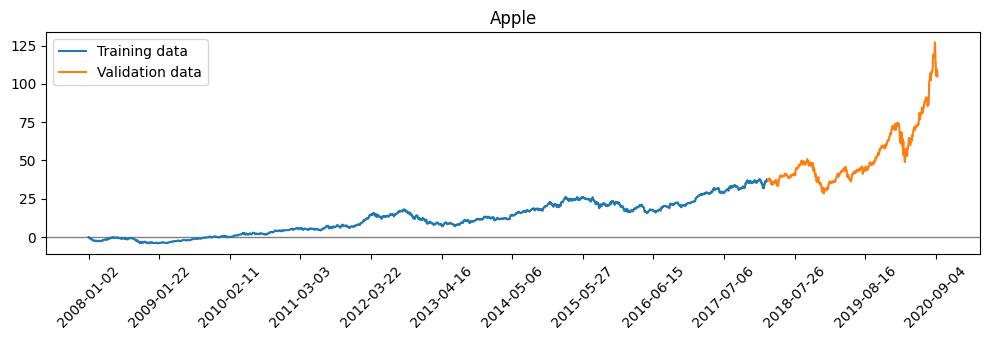

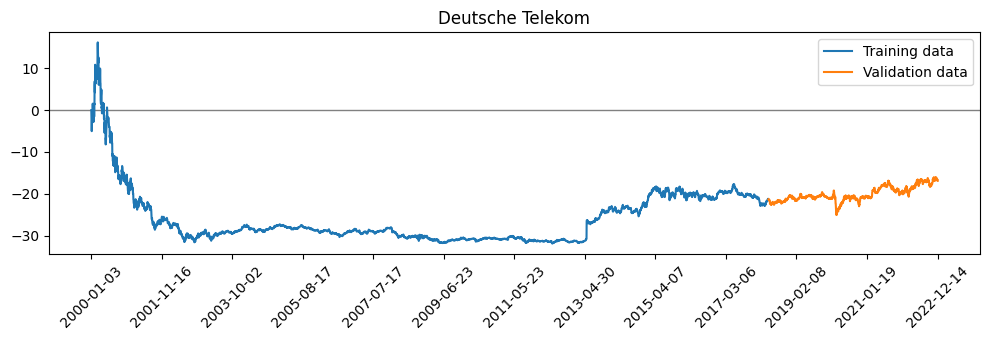

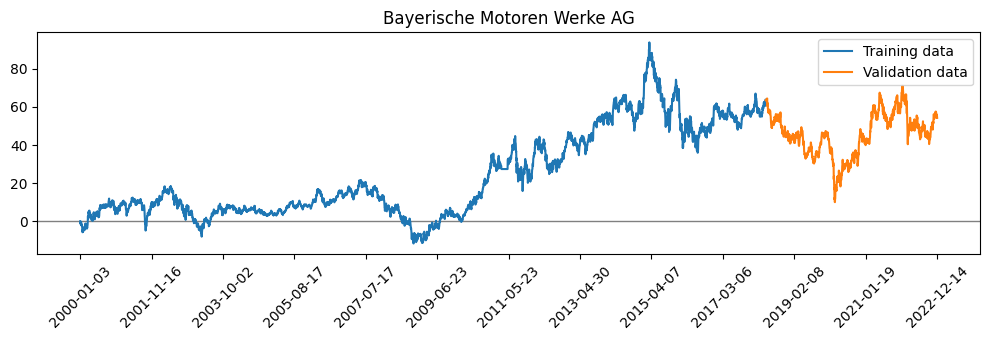

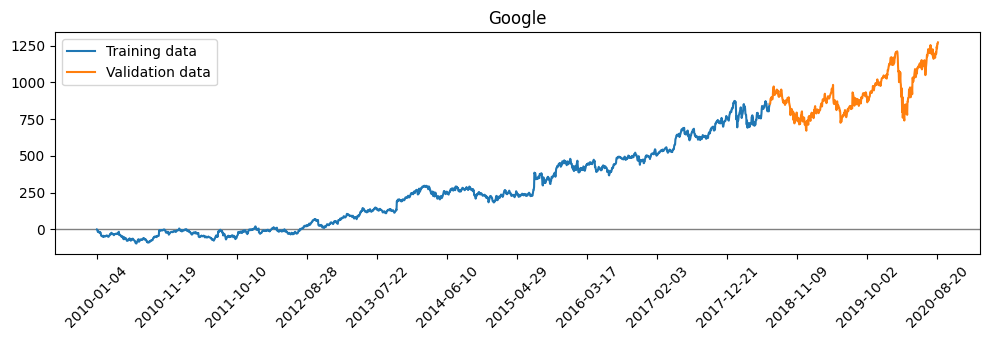

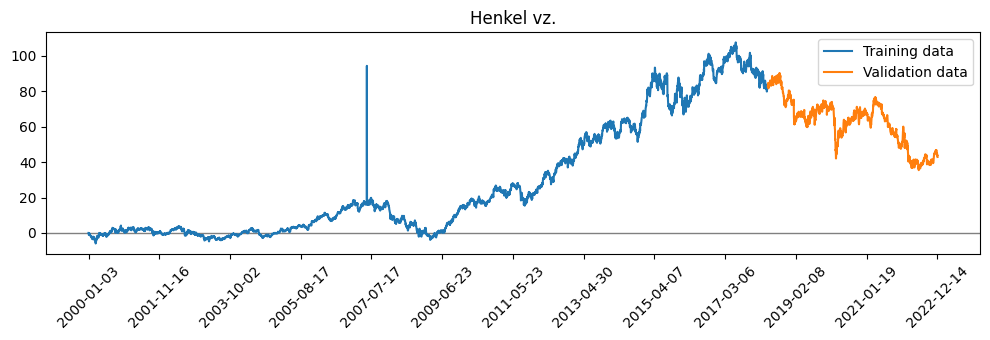

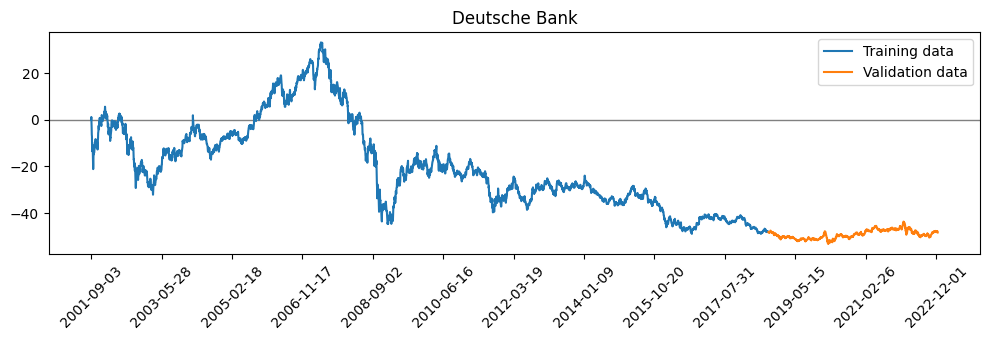

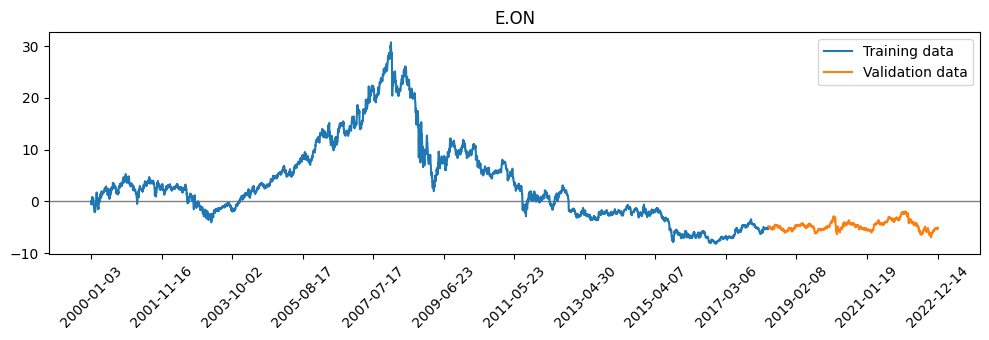

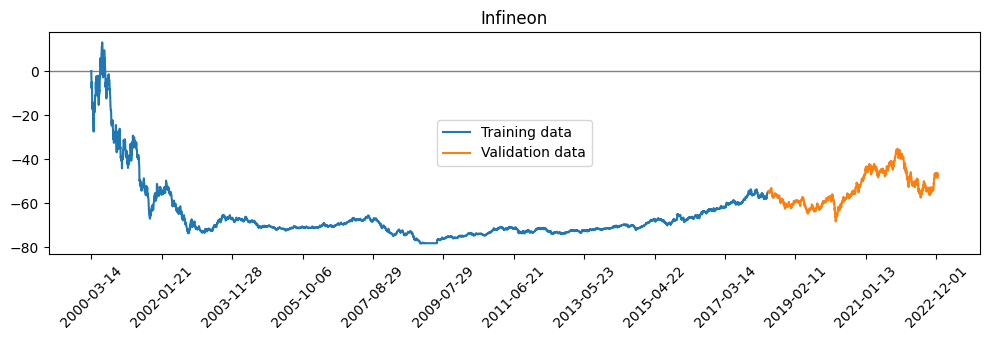

In [44]:

def plot_stock(name: str, df: DataFrame):
    t_value = 'Training data'
    v_value = 'Validation data'
    total_points = len(df)
    n_ticks = 12  # Number of desired ticks
    x_ticks = df.index[::total_points // n_ticks]
    
    plt.figure(figsize=(10, 3.5))
    plt.plot(df.index, df[[t_value, v_value]], label=[t_value, v_value])
    
    plt.xticks(x_ticks, rotation=45)
    ax = plt.gca()
    ax.axhline(y=0, color='gray', linestyle='-', linewidth=1, zorder=-1)
    plt.title(name)
    plt.tight_layout()
    plt.legend()
    plt.savefig(f"./graphs/rawstock/{name}_slim.png")
    plt.show()
    plt.close()

for i in range(len(all_dfs)):
    plot_stock(all_class[i], all_dfs[i])
